# Retail Giant Sales Forecasting 

## 1. Reading and Understanding Data

In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# read the dataset
df = pd.read_csv('Global+Superstore+Data.csv')

In [3]:
# view of dataset
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
# basics of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [5]:
# inspecting shape of the dataset
df.shape

(51290, 5)

In [6]:
# Checking Important Parameters
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


## 2. Data Preparation

In [7]:
# converting the data format to 'year month' format in Order Date column 
df['Order Date'] = pd.to_datetime(df['Order Date'], format = '%d-%m-%Y').dt.to_period('M')
df.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


In [8]:
# concating column 'Market' and 'Segment'
df['Market Segment'] = df['Market'].astype(str) + ["_"] + df['Segment']
df.head()

,Order Date,Segment,Market,Sales,Profit,Market Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [9]:
# Aggregating the total values of profit for 21 market_segments by ordered month and year using pivot table
df_pivot = df.pivot_table(index = 'Order Date', values = 'Profit', columns = 'Market Segment' ,aggfunc = 'sum')
df_pivot.head()

Market Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [10]:
# viewing last entries of columns
df_pivot.tail()

Market Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2014-08,5050.6929,1722.2874,2211.4455,3934.101,-66.864,1067.970,321.18,71.13,144.96,2232.021,...,-80.568,8045.1225,5136.6645,5403.2130,4083.28768,1716.99348,1278.36240,2674.2465,4667.7445,1552.4576
2014-09,5758.2162,5392.7694,7290.0429,3345.822,-387.165,765.531,194.25,289.20,63.48,2770.461,...,-257.274,7567.2075,10510.5540,2738.3475,5827.53088,2256.83932,2540.53700,5994.5028,3151.8333,2249.1033
2014-10,11824.2486,4155.1648,5850.4515,2278.191,2678.727,-103.149,299.13,385.41,NaN,588.738,...,510.654,6378.0075,2336.6700,2261.6820,3900.67532,3006.86876,1961.82448,2546.1627,2863.3104,4031.1877
2014-11,12869.9883,5693.9367,5344.7532,3824.202,-217.344,3060.981,183.06,4.05,86.64,1237.902,...,-73.785,6922.0860,3867.5235,1294.1535,5063.50480,2211.00024,1363.85176,6629.4842,749.1913,2303.8764
2014-12,7192.6810,2504.8152,2760.5631,98.130,301.293,385.998,382.89,1193.58,32.40,1403.502,...,-129.945,4787.3535,4642.9335,3650.6475,5016.20240,1318.80776,1578.06872,5338.6293,-771.3878,3965.6265


In [11]:
# inspecting shape of the dataset
df_pivot.shape

(48, 21)

In [12]:
# splitting the pivot data into train dataset and test dataset
train_len = 42
train = df_pivot[0:train_len]
test = df_pivot[train_len:]

In [13]:
# inspecting train dataset
train.head()

Market Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [14]:
# inspecting shape of train data set
train.shape

(42, 21)

In [15]:
# inpecting shape of test data set
test.shape

(6, 21)

In [16]:
# finding the Coefficient of the Variance (COV)
mean = np.mean(train)
std = np.std(train)

COV = std/mean
COV = pd.DataFrame(COV)
COV = COV.reset_index()

COV.columns = ['Market Segment','Most Consistent']
COV.sort_values(by= 'Most Consistent', ascending= True, inplace = True )
COV

,Market Segment,Most Consistent
0,APAC_Consumer,0.596404
12,EU_Consumer,0.647485
15,LATAM_Consumer,0.680684
13,EU_Corporate,0.689346
1,APAC_Corporate,0.731926
16,LATAM_Corporate,0.880260
19,US_Corporate,1.027209
2,APAC_Home Office,1.048817
18,US_Consumer,1.095295
14,EU_Home Office,1.114681


In [17]:
# Selecting Data with Market Segment = APAC_Consumer 
df_new = df[df['Market Segment'] =='APAC_Consumer']
df_new.head()

,Order Date,Segment,Market,Sales,Profit,Market Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-11,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [18]:
# dropping all other columns except 'Order Date' and 'Sales'
df_new = df_new.drop(columns=['Segment','Market','Profit','Market Segment'])

In [19]:
# Inspecting shape of columns after dropping the columns
df_new.shape

(5699, 2)

In [20]:
# Making 'Order Date' as index
df_new = df_new.set_index('Order Date')
df_new.head()

,Sales
Order Date,
2013-10,5175.171
2011-11,1822.080
2012-04,5244.840
2013-06,3701.520
2012-02,1878.720


In [21]:
# Inspecting shape of columns
df_new.shape

(5699, 1)

In [22]:
# Summing up the multiple data entities by grouping all the sales
df_new = df_new.groupby('Order Date').sum()
df_new.head()

,Sales
Order Date,
2011-01,15711.7125
2011-02,12910.8588
2011-03,19472.5632
2011-04,15440.3046
2011-05,24348.9723


In [23]:
# Inspecting shape of columns after summing columns
df_new.shape

(48, 1)

In [24]:
# Converting order data to current local date
df_new = df_new.to_timestamp()
df_new.head()

,Sales
Order Date,
2011-01-01,15711.7125
2011-02-01,12910.8588
2011-03-01,19472.5632
2011-04-01,15440.3046
2011-05-01,24348.9723


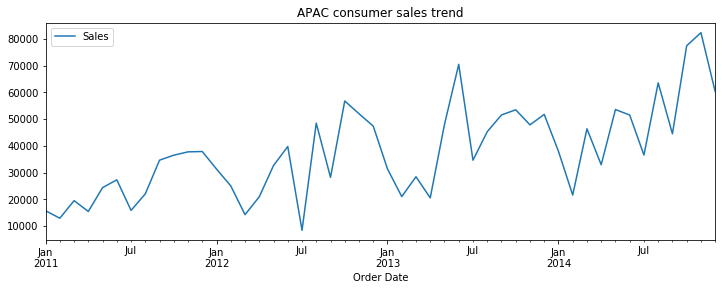

In [25]:
# plotting sales series data of APAC Consumer
df_new.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('APAC consumer sales trend')
plt.show(block=False)

## 3. Outlier detection

In [26]:
# importing seaborn 
import seaborn as sns

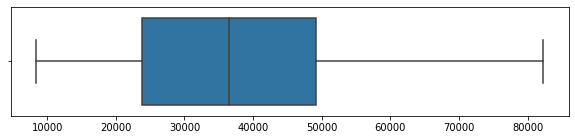

In [27]:
# plotting box plot for outlier detection
fig = plt.subplots(figsize=(10, 2))
ax = sns.boxplot(x=df_new, whis=1.5)

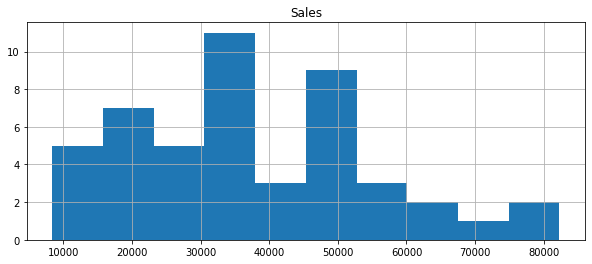

In [28]:
# plotting histogram
fig = df_new.hist(figsize = (10,4))

## 4. Time Series Decomposition

#### 4.1 Additive Seasonal Decomposition

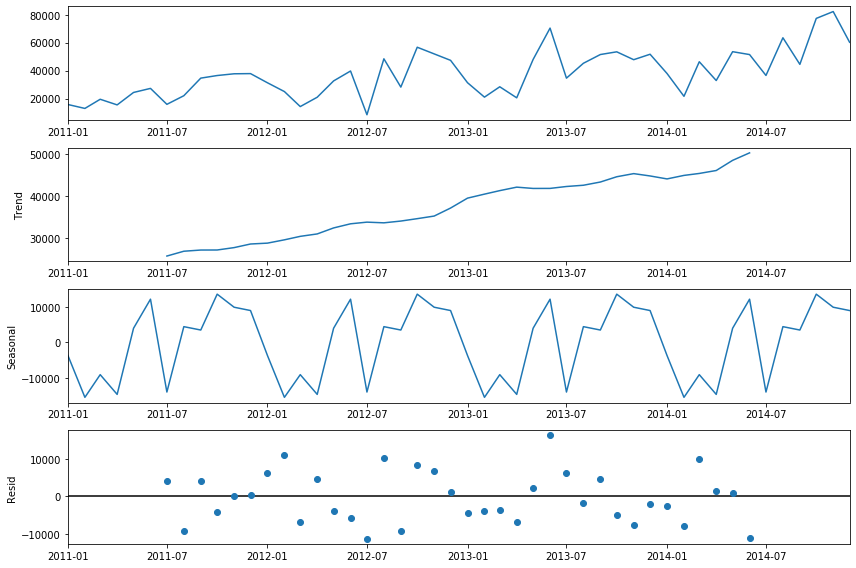

In [29]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(df_new, model='additive')
fig = decomposition.plot()
plt.show()

#### 4.2 Multiplicative Seasonal Decomposition

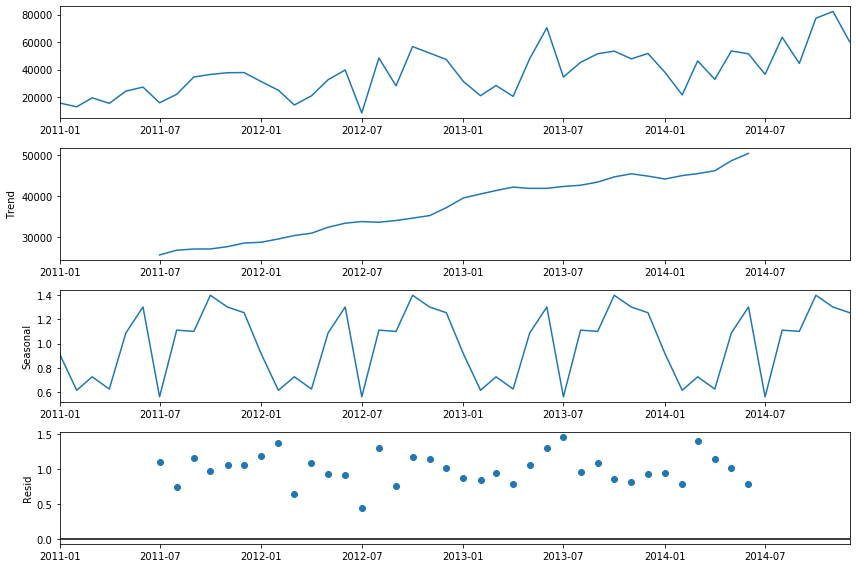

In [30]:
decomposition = sm.tsa.seasonal_decompose(df_new, model='multiplicative')
fig = decomposition.plot()
plt.show()

## 5. Building and Evaluating Time Series Forecast Model

In [31]:
# spliting time series data into train dataset and test dataset
train_len = 42
train = df_new[0:train_len]
test = df_new[train_len:]

#### Navie Method

In [32]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

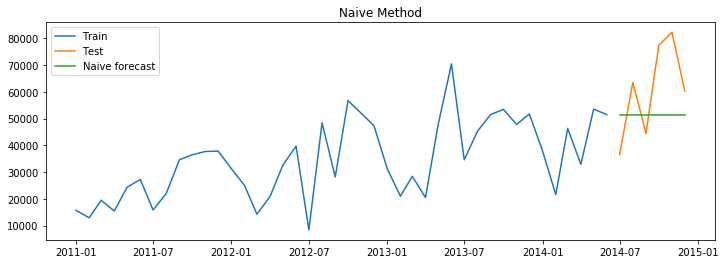

In [33]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [34]:
# Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE':[mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86


#### Simple Average Method

In [35]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

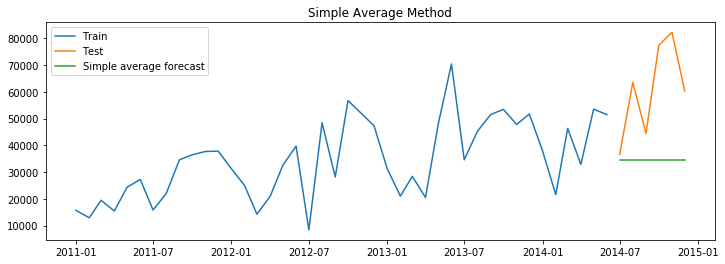

In [36]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [37]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18


#### Simple Moving Average Method

In [38]:
y_hat_sma = df_new.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = df_new['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

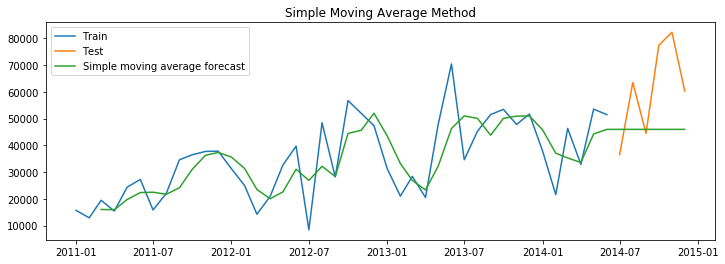

In [39]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [40]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55


### 5.1 Exponential Smoothing Methods

#### Simple Exponential Smoothing

In [41]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(smoothing_level=0.2,optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(24)

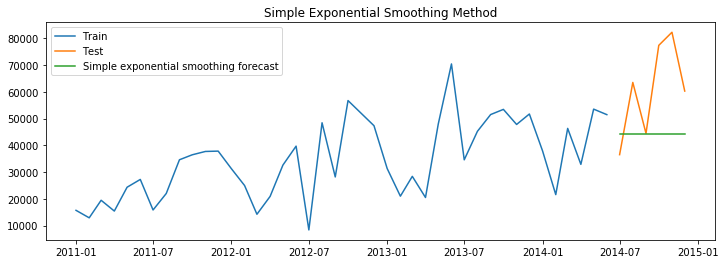

In [42]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [43]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82


#### Holt's Method With Trend

In [44]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_slope': 0.01, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 16854.28883044178, 'initial_slope': 730.4637663180029, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


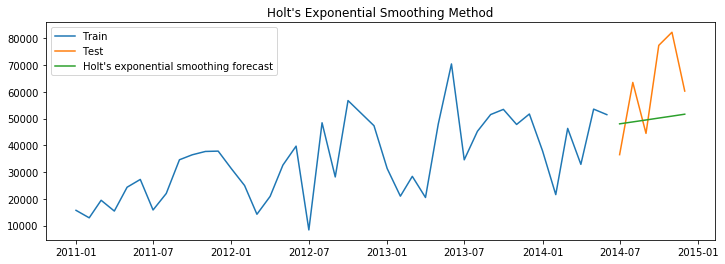

In [45]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [46]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60


#### Holt Winters' Additive Method With Trend And Seasonality

In [47]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.052631578947367676, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.10526315789474944, 'damping_slope': nan, 'initial_level': 29061.291899999593, 'initial_slope': 730.4167145833245, 'initial_seasons': array([-13349.5794, -16150.4331,  -9588.7287, -13620.9873,  -4712.3196,
        -1801.2723, -13218.4602,  -7049.0553,   5551.893 ,   7410.7551,
         8661.312 ,   8785.6992]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


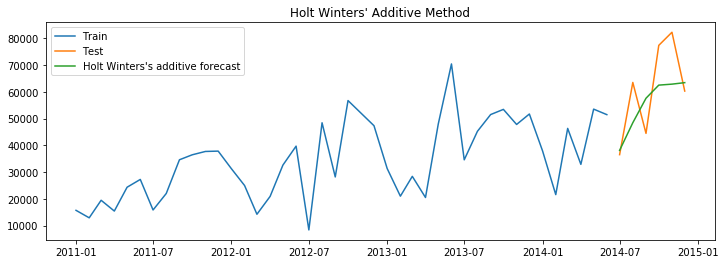

In [48]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [49]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61


#### Holt Winter's Multiplicative Method With Trend And Seasonality

In [50]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.21052631578947367, 'damping_slope': nan, 'initial_level': 29061.291900000004, 'initial_slope': 730.4167145833347, 'initial_seasons': array([0.54064054, 0.44426307, 0.67005153, 0.53130138, 0.83784893,
       0.93801816, 0.54515235, 0.75744178, 1.19104082, 1.25500432,
       1.29803603, 1.3023162 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Ratik\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


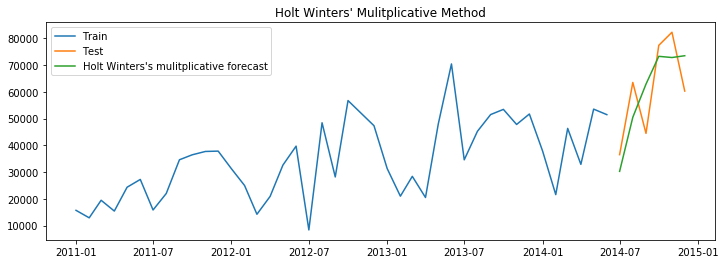

In [51]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [52]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62


### 5.2 Auto Regressive Methods

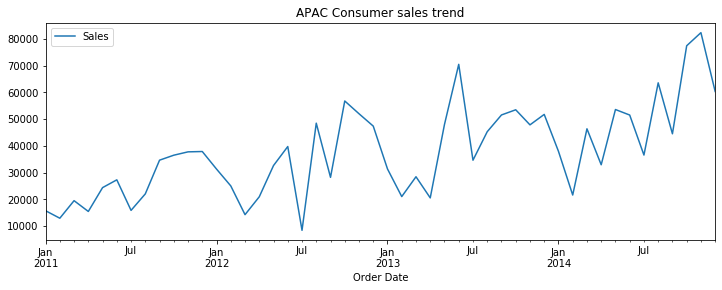

In [53]:
df_new['Sales'].plot(figsize=(12,4))
plt.legend(loc='best')
plt.title('APAC Consumer sales trend')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) Test

In [54]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_new['Sales'])
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4] ['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.220857
Critical Values @ 0.05: -2.93
p-value: 0.198763


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [55]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_new['Sales'])
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.595515
Critical Values @ 0.05: 0.46
p-value: 0.023044


#### Box Cox Transformation To Make Variance Constant

<Figure size 864x288 with 0 Axes>

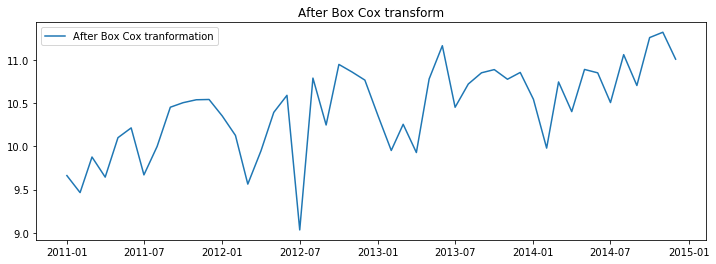

In [56]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_new['Sales'], lmbda=0), index = df_new.index)
plt.figure(figsize=(12,4))

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

#### Differencing to Remove Trend

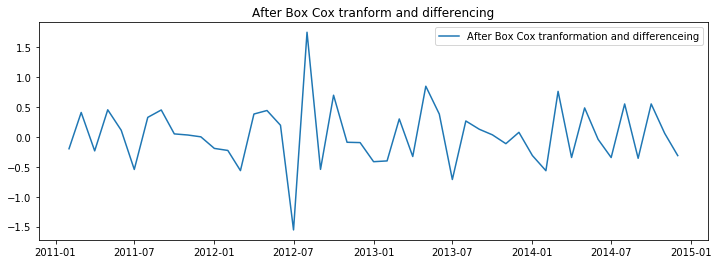

In [57]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_new.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differenceing')
plt.legend(loc='best')
plt.title('After Box Cox tranform and differencing')
plt.show()

In [58]:
data_boxcox_diff.dropna(inplace=True)

In [59]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.553405
2014-09-01   -0.356405
2014-10-01    0.553748
2014-11-01    0.061479
2014-12-01   -0.311004
Freq: MS, dtype: float64

#### Augmented Dickey-Fuller (ADF) Test

In [60]:
adf_test = adfuller(data_boxcox_diff)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -5.769275
Critical Values @ 0.05: -2.95
p-value: 0.000001


#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test

In [61]:
kpss_test = kpss(data_boxcox_diff)
print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.135659
Critical Values @ 0.05: 0.46
p-value: 0.100000


C:\Users\Ratik\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


#### Autocorrelation Function (ACF)

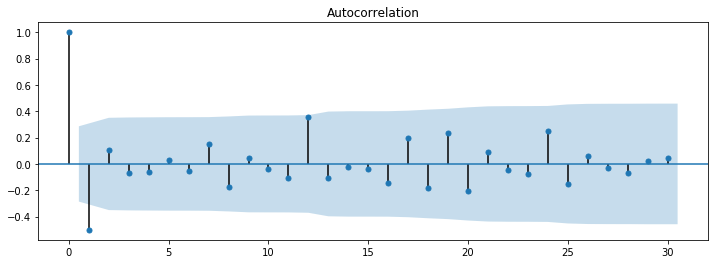

In [62]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

#### Partial Autocorrelation Function (PACF)

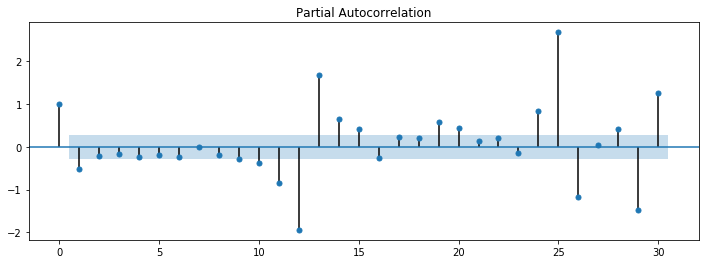

In [63]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags=30)
plt.show()

In [64]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [65]:
train_data_boxcox_diff

Order Date
2011-02-01   -0.196338
2011-03-01    0.410938
2011-04-01   -0.232025
2011-05-01    0.455508
2011-06-01    0.112932
2011-07-01   -0.542704
2011-08-01    0.328881
2011-09-01    0.452636
2011-10-01    0.052311
2011-11-01    0.033713
2011-12-01    0.003292
2012-01-01   -0.190545
2012-02-01   -0.224703
2012-03-01   -0.562166
2012-04-01    0.384877
2012-05-01    0.443562
2012-06-01    0.197027
2012-07-01   -1.554595
2012-08-01    1.753416
2012-09-01   -0.541343
2012-10-01    0.699452
2012-11-01   -0.087925
2012-12-01   -0.093177
2013-01-01   -0.412912
2013-02-01   -0.400011
2013-03-01    0.302394
2013-04-01   -0.326054
2013-05-01    0.849926
2013-06-01    0.383940
2013-07-01   -0.710954
2013-08-01    0.268477
2013-09-01    0.129600
2013-10-01    0.036881
2013-11-01   -0.111427
2013-12-01    0.078506
2014-01-01   -0.310206
2014-02-01   -0.563617
2014-03-01    0.764032
2014-04-01   -0.342611
2014-05-01    0.487122
2014-06-01   -0.039254
Freq: MS, dtype: float64

#### Auto Regression Method (AR)

In [66]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,0))
model_fit = model.fit()
print(model_fit.params)

const      0.031320
ar.L1.y   -0.483978
dtype: float64


In [67]:
# Recover Original Time Series
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

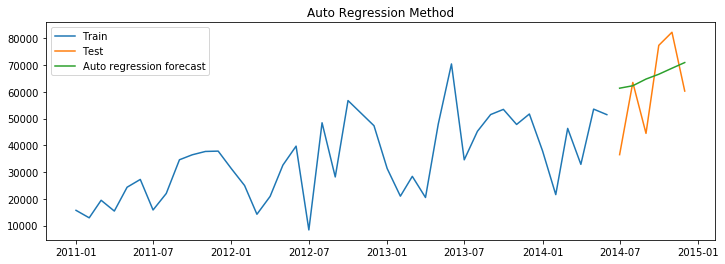

In [68]:
# Plot Train, Test and Forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [69]:
# Calculate RMSE and MAPE
rmse =  np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregression (AR) method'], 'RMSE':[rmse], 'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregression (AR) method,15505.02,27.27


#### Moving Average Method (MA)

In [70]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1))
model_fit = model.fit() 
print(model_fit.params)

const      0.022694
ma.L1.y   -1.000000
dtype: float64


In [71]:
# Recover original time series
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

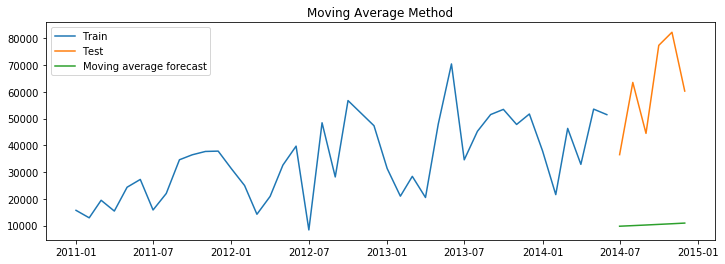

In [72]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(df_new['Sales'][:train_len], label='Train')
plt.plot(df_new['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [73]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregression (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64


#### Auto regression moving average method (ARMA)

In [74]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1))
model_fit = model.fit()
print(model_fit.params)

const      0.022810
ar.L1.y    0.115922
ma.L1.y   -0.999969
dtype: float64


In [75]:
# Recover Original Time Series Forecast
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

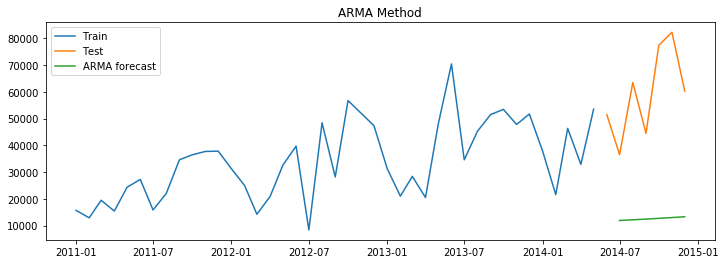

In [76]:
# Plot Train, Test and Forecast
plt.figure(figsize=(12,4))
plt.plot( df_new['Sales'][:train_len-1], label='Train')
plt.plot(df_new['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [77]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregression (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


#### Auto Regressive Integrated Moving Average (ARIMA)

In [78]:
model = ARIMA(train_data_boxcox, order=(1,1,1))
model_fit = model.fit()
print(model_fit.params)

const        0.022810
ar.L1.D.y    0.115922
ma.L1.D.y   -0.999969
dtype: float64


In [79]:
# Recover original time series forecast
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

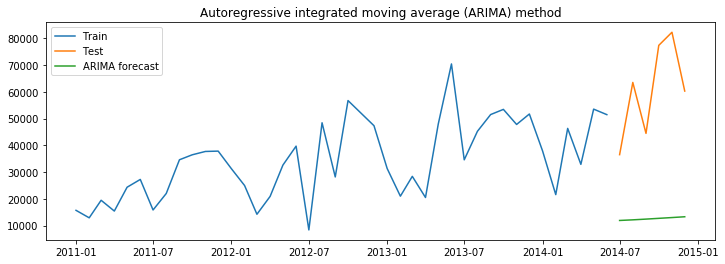

In [80]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [81]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregression (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66


#### Seasonal Auto Regressive Integrated Moving Average (SARIMA)

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,0,12))
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.060969
ma.L1      -0.995440
ar.S.L12   -0.709637
sigma2      0.084622
dtype: float64


In [83]:
# Recover Original Time Series Forecast
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

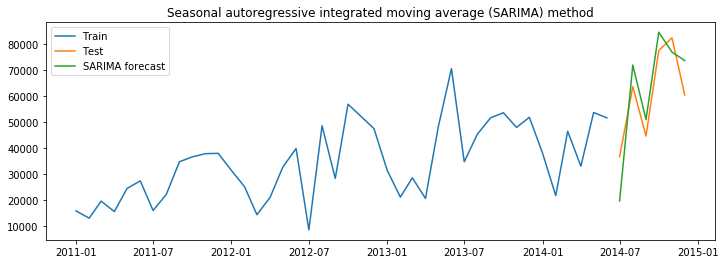

In [84]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [85]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,18774.05,26.86
0,Simple average method,30846.00,38.18
0,Simple moving average forecast,22019.48,27.55
0,Simple exponential smoothing forecast,23112.16,27.82
0,Holt's exponential smoothing method,19025.81,25.60
0,Holt Winters' additive method,12971.01,17.61
0,Holt Winters' multiplicative method,11753.42,19.62
0,Autoregression (AR) method,15505.02,27.27
0,Moving Average (MA) method,52903.35,81.64
0,Autoregressive moving average (ARMA) method,50757.93,77.66
